# 1.Installing and importing required packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

# 2.Loading the Data Set

In [2]:
#Loading the data_Set(used double backlashed to separate out escape characters from pathfile url)
dataFile = pd.read_csv('D:\my courses\DATA SCIENCE\portfolio\machine learning\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 3.Doing EDA on given data

In [3]:
#exploring Variables in dataset
#dataFile
dataFile.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# getting a bit more statistical overview of attributes in data_Set
dataFile.describe()
# here we can see in the output that only 3 features. Possible reason is that the our features data types are different 
# and here we 
# can only see features with one datatype== int
##SeniorCitizen is a categorical Variable entered as '0' or '1' .So, apart from count other statistical 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


-->>75% of the population has tenure less than 5000

-->>Average monthly charges per user from the population is 64.7$ and 25 percent of the population pays more than Avg MonthlyCharges

In [5]:
# get to know names of the  features in our data_Set(Also includes our label== Churn)
dataFile.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
    #identifying the datatypes in data prior to doing anlaysis
dataFile.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#exploring our label variable to see number of churners in the  given dataset to identify if imbalanced classification exists..
100*dataFile['Churn'].value_counts()/len(dataFile['Churn'])


No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [8]:
valueCount = dataFile['Churn'].value_counts()
print(valueCount)

No     5174
Yes    1869
Name: Churn, dtype: int64


Text(0.5, 1.02, 'Count of (TARGET) Churn Variable per category')

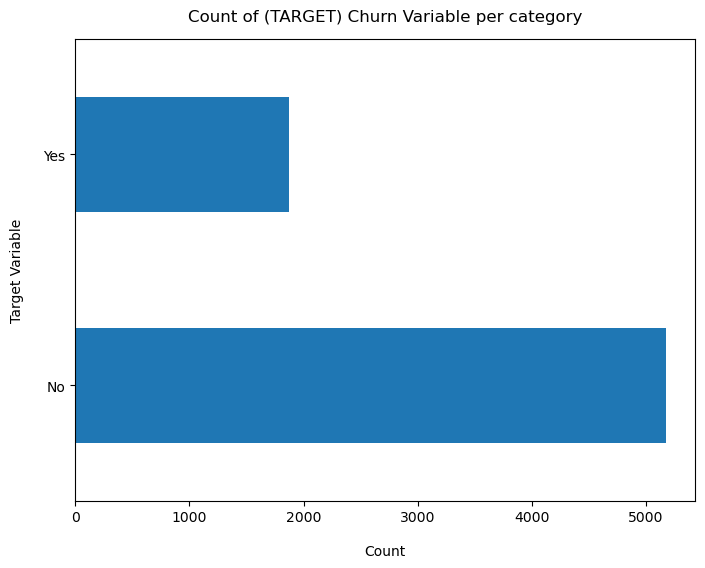

In [9]:
dataFile['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of (TARGET) Churn Variable per category", y=1.02)

Hence, we can see that data is highly imbalanced by ration 3:1 approx
Training model will raise an overfit problem.Model Accuracy will be cursed in this case
Model will give more accuracy on test data and will fail to provide good accuracy on test data

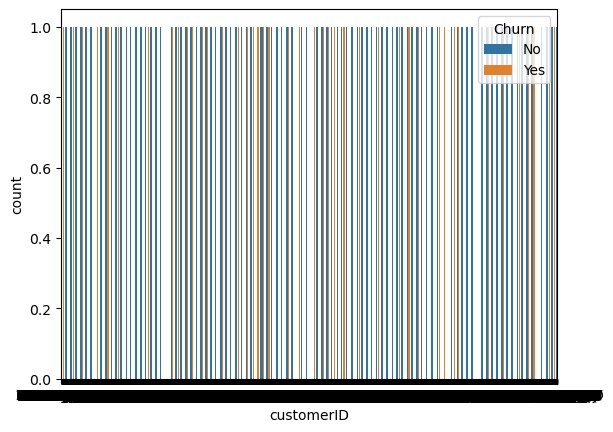

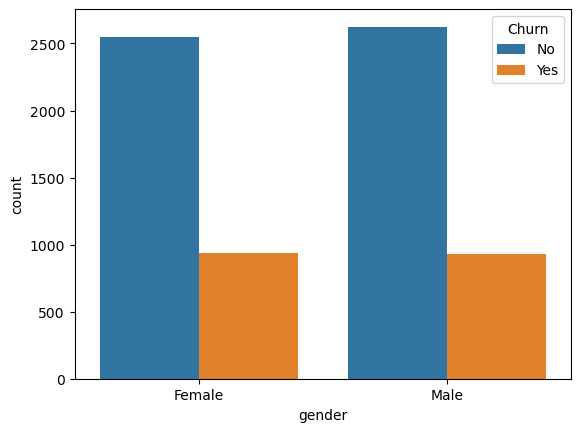

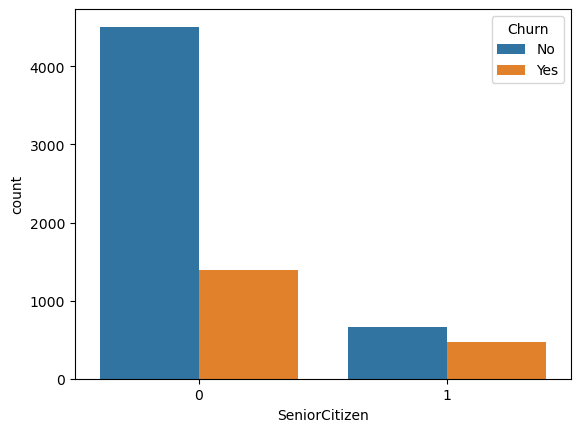

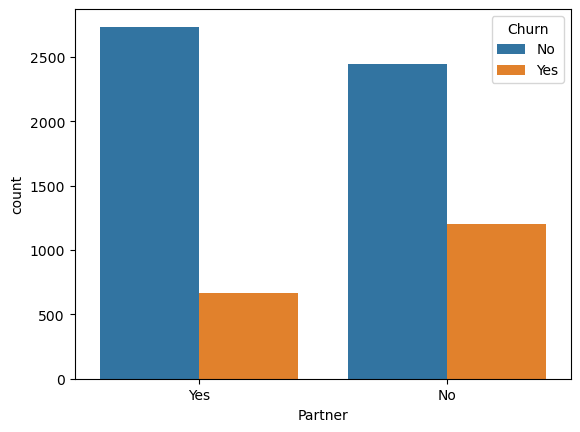

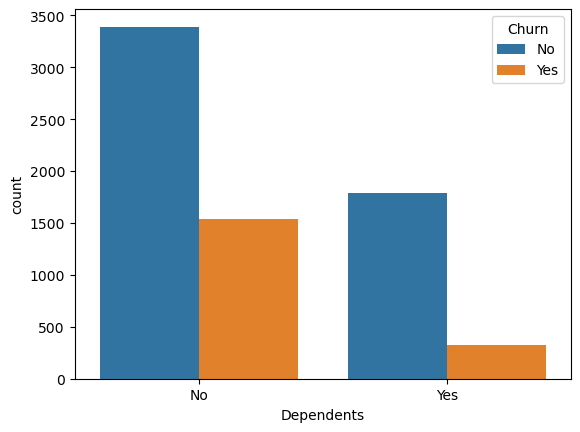

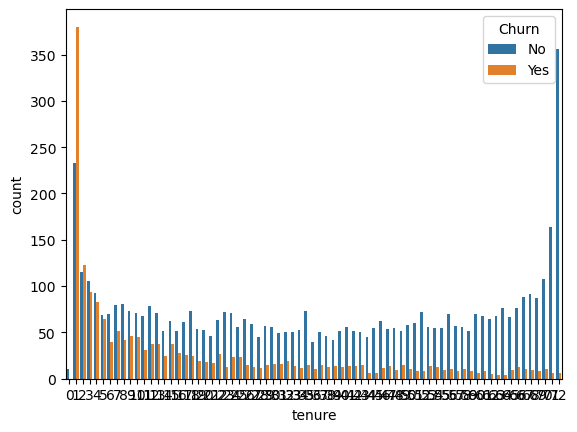

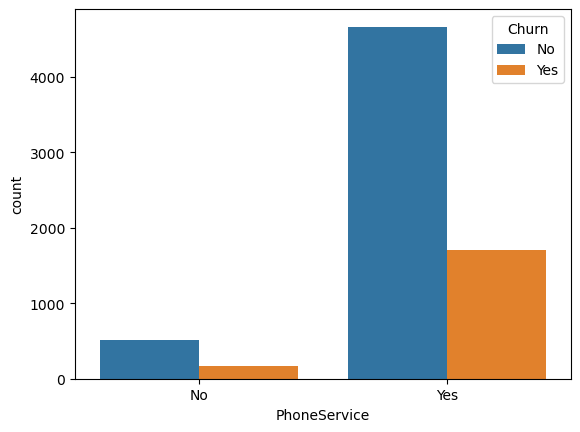

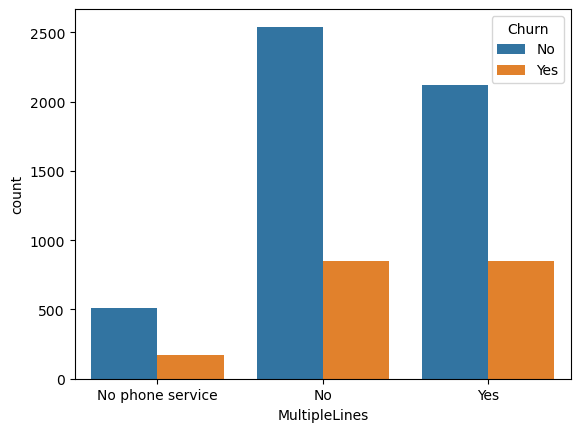

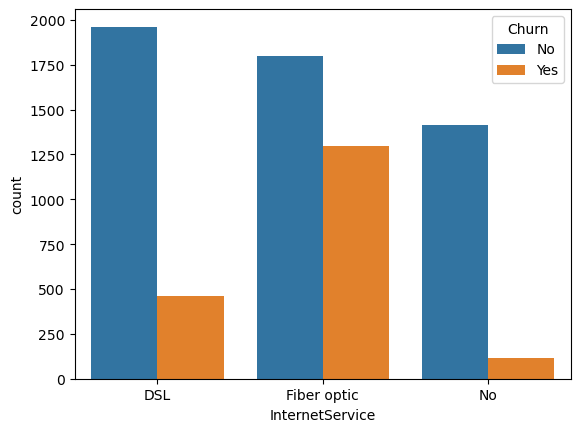

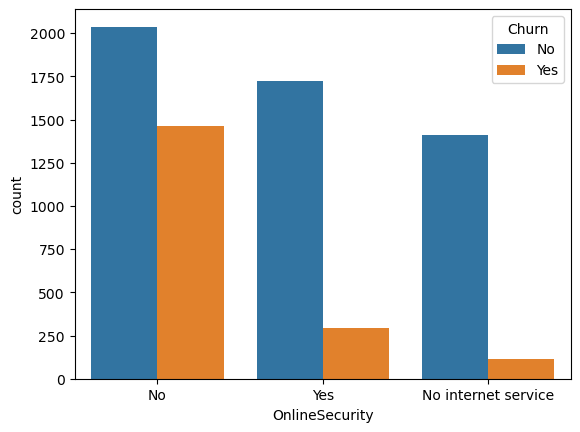

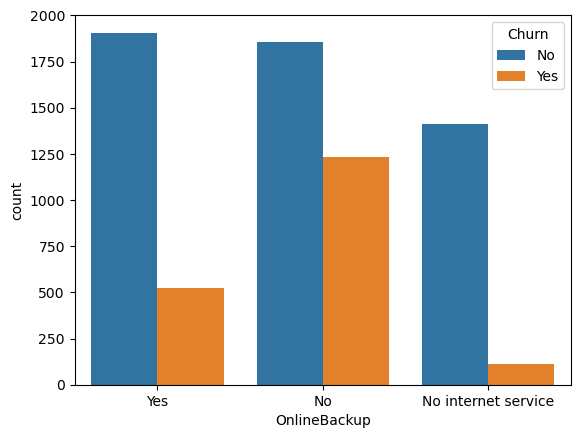

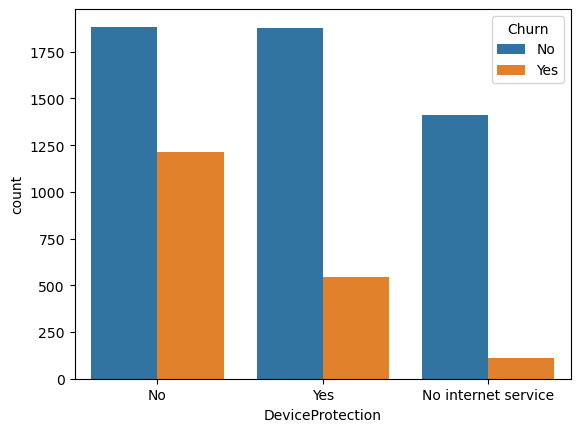

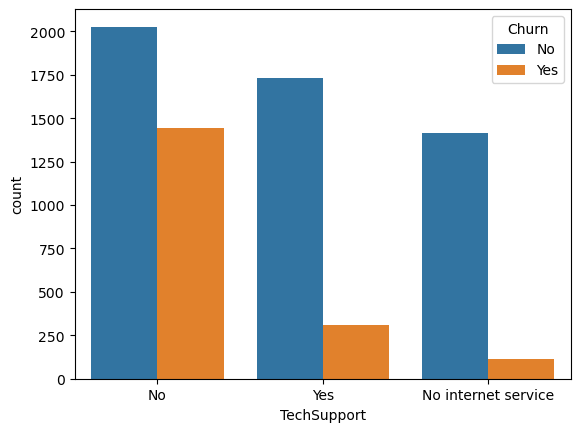

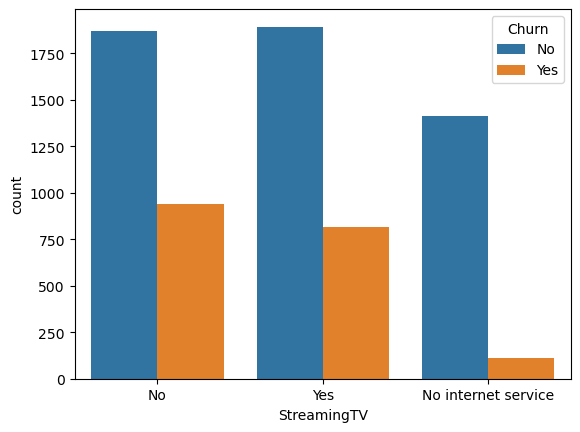

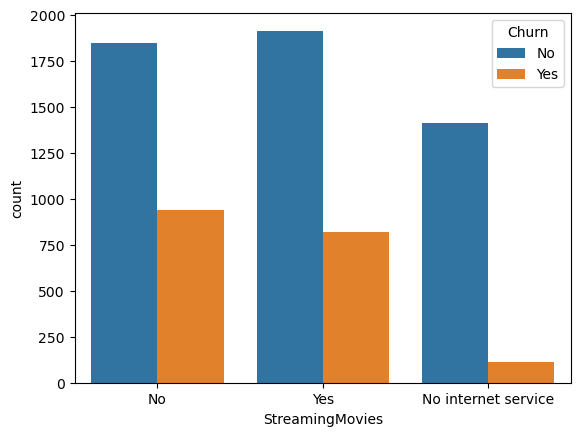

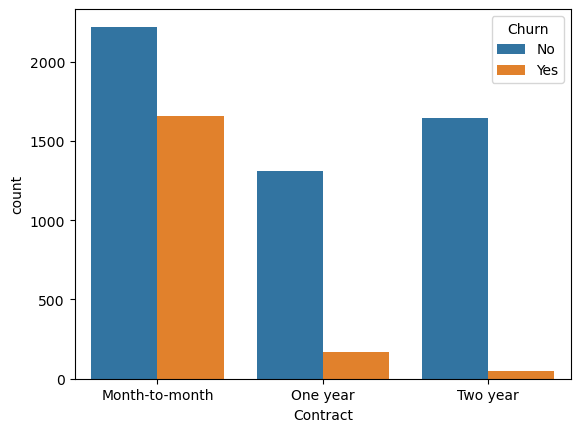

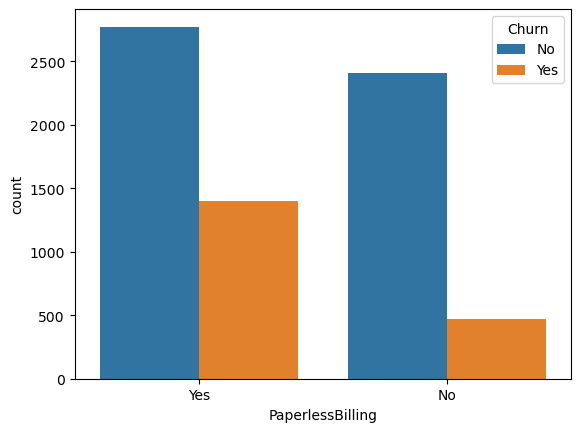

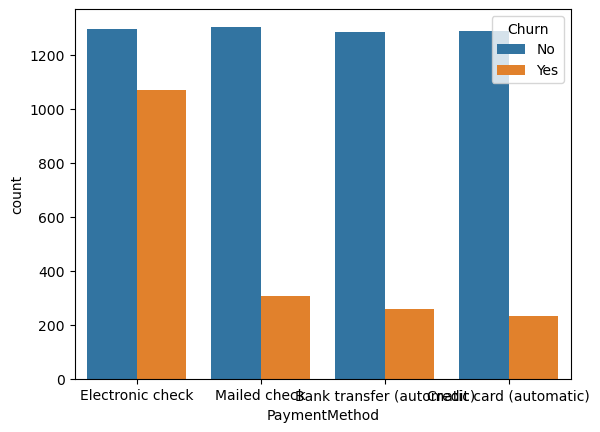

In [10]:
for i, predictor in enumerate(dataFile.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=dataFile, x=predictor, hue='Churn')

### We can Also use the following visualization to do univariate,bivariate analysis on our features

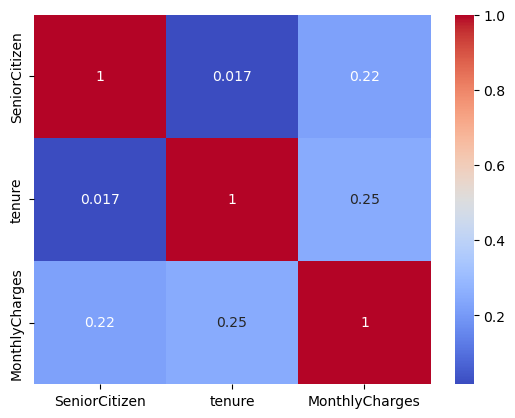

In [11]:
# Univariate analysis
# Descriptive statistics
#dataFile.describe()

# Histogram for each variable
#dataFile.hist(bins=10, figsize=(20,15))
#plt.show()

# Bivariate analysis
# Pairplot for all variables
#sns.pairplot(dataFile)
#plt.show()
sns.heatmap(dataFile.corr(), annot=True, cmap='coolwarm')
plt.show()

## 4.Creating a Copy of Data Before Cleaning

In [12]:
copyFile = dataFile.copy()

# 5.Data Cleaning

## 5.a Exploring Null Values

In [13]:
copyFile.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 5.b Visualizing Missing Values in Dataset

C:\Users\Nexgen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


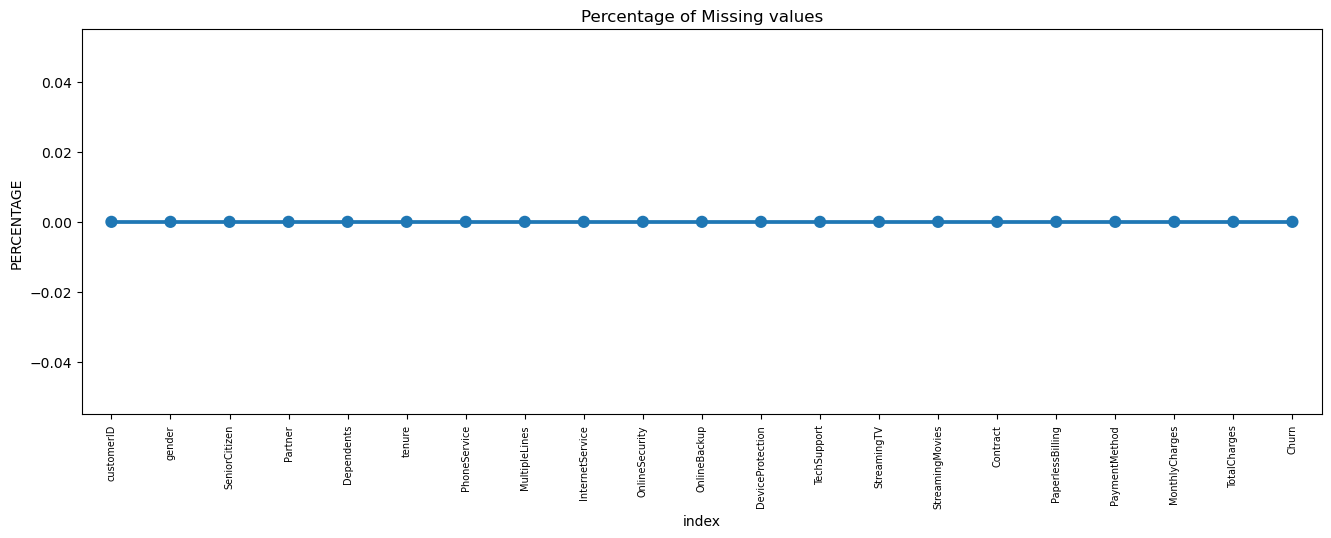

In [14]:
missing = pd.DataFrame((copyFile.isnull().sum())*100/copyFile.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

As we have no missing values if in case of missing values in the dataset. In case of a missing value we can
===>>> replace missing values with mean of that feature
===>>> replace null values by deleting that observation(row)
===>>> use a ML algorithm such as time series prediction to missing values of a given feature
===>>> fill the missing, null value with the previous observation of that feature.

In [15]:
# Check for missing values in the entire dataframe
#copyFile.isnull().sum()

# Drop rows with null values
#df = copyFile.dropna()

# Fill null values with the mean value of the column
# df = copyFile.fillna(df.mean())

# Fill null values with a specific value
# df = copyFile.fillna(0)

# Save the cleaned data to a new file
# copyFile.to_csv('cleaned_data.csv', index=False)

### 5.c Outlier Dectection and Removing Outliers
#### we can use below code but as we have to feature engineering first(we will convert categorical variables into 
#### numerical first).Then we will reomove them.

In [16]:
#    outliers = set()
 #   for col in data.columns:
  #      z_score = np.abs((data[col] - data[col].mean()) / data[col].std())
   #     outliers.update(data[z_score > threshold].index)
    #return outliers
#detect_outliers(copyFile, 3)
#def remove_outliers(data, columns, threshold):
 #   data_copy = data.copy()
  #  for col in columns:
   #     z_score = np.abs((data_copy[col] - data_copy[col].mean()) / data_copy[col].std())
    #    data_copy = data_copy[z_score < threshold]
  #  return data_copy
#df = remove_outliers(copyFile, ['column_1', 'column_2', ..., 'column_29'], 3)


# 6.Feature Engineering

### 6.1 describing and viewing data and data types again

In [17]:
copyFile.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
copyFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


we can see that
==>seniorCitizen is a categorical variable.
==>customer id is unique and of no use to use in any possible statistical way.
==>Total Charges should be numerical category.

### 6.2 Converting Datatype of Obvious feature into obvious categories

In [19]:
copyFile.TotalCharges = pd.to_numeric(copyFile.TotalCharges, errors='coerce')

### 6.3 Checking and cleaning null values if any

In [20]:
copyFile.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
# Finding where we ar getting null values
copyFile.loc[copyFile ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [22]:
#Removing missing values 
copyFile.dropna(how = 'any', inplace = True)

### 6.4 grouping tenure feature into month wise to get monthly tenure(into Numeric Category)

In [23]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
copyFile['tenure_group'] = pd.cut(copyFile.tenure, range(1, 80, 12), right=False, labels=labels)

In [24]:
copyFile['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

### 6.5 converting churn into binary 

In [25]:
copyFile['Churn'].dtype

dtype('O')

In [26]:
copyFile['Churn'] = np.where(copyFile.Churn == 'Yes',1,0)
copyFile.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


# 7.Feature Extraction

##### Here are we will reomove any unwanted or features which wont be helpful to us in specific case prediction analysis

In [27]:
#drop column customerID and tenure as they give very less information
copyFile.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
copyFile.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


### 6.6 Converting All Categorical Data features into Dummy Variables

In [28]:
# other famous techniques are onehot-enconding, lable enconding etc...
copyfileDummy = pd.get_dummies(copyFile)
copyfileDummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


we can use pca here to reduce feature columns to required optimal number of features 
here i am using all of the features to train my model best.


In [29]:
#PCA for reference
#X = copyfileDummy.drop('Churn', axis=1) # remove the target variable column from the feature set
#pca = PCA(n_components=2) # reduce the dataset to 2 principal components
#X_pca = pca.fit_transform(X)

# 8.Doing EDA on cleaned and ready DAtaset

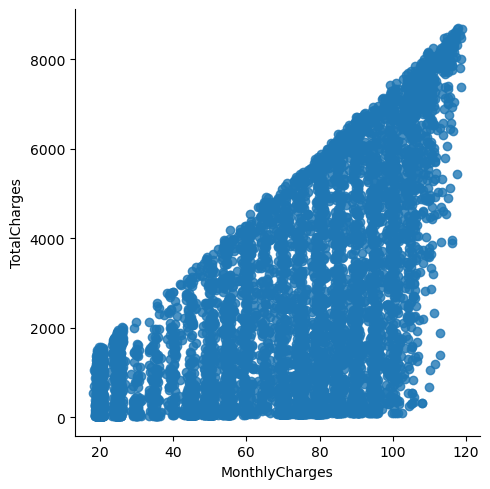

In [30]:
sns.lmplot(data=copyfileDummy, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [31]:
# Univariate analysis
# Descriptive statistics
copyfileDummy.describe()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.00000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,64.798208,2283.300441,0.265785,0.495307,0.504693,0.517491,0.482509,0.701507,0.298493,...,0.219283,0.216297,0.336320,0.228100,0.309300,0.14562,0.118316,0.108362,0.118316,0.200085
std,0.368844,30.085974,2266.771362,0.441782,0.500014,0.500014,0.499729,0.499729,0.457629,0.457629,...,0.413790,0.411748,0.472483,0.419637,0.462238,0.35275,0.323005,0.310859,0.323005,0.400092
min,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


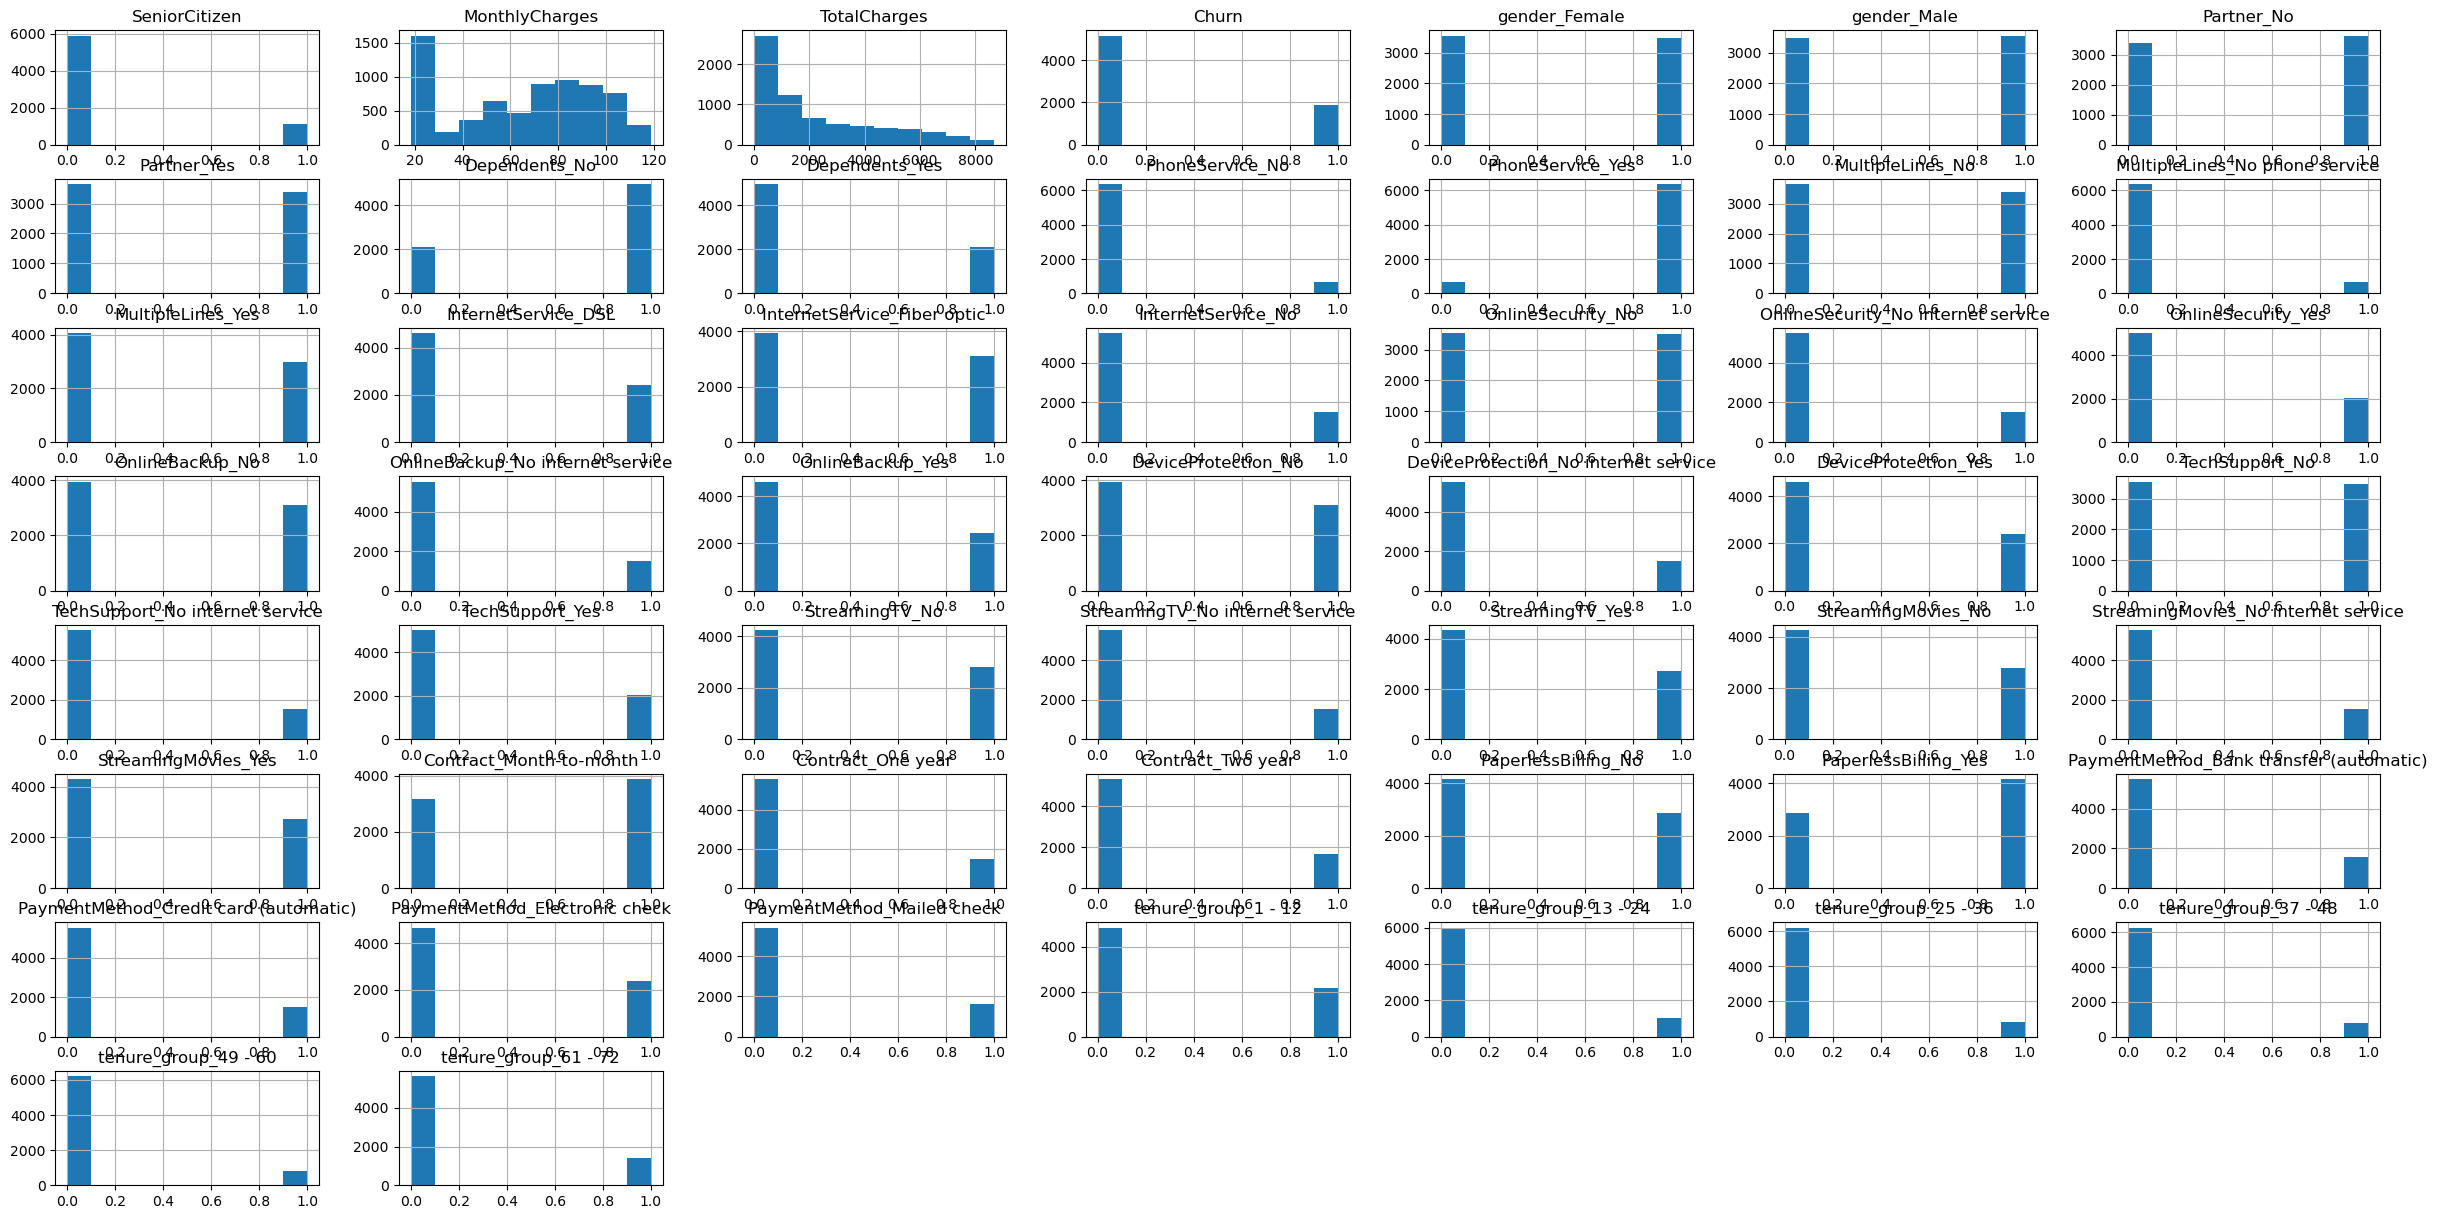

In [32]:
# Histogram for each variable
copyfileDummy.hist(bins=10, figsize=(30,15))
plt.show()

In [ ]:
# Bivariate analysis
# Pairplot for all variables
#sns.pairplot(copyfileDummy)
#plt.show()

In [ ]:
#Build a corelation of all predictors with 'Churn
plt.figure(figsize=(20,8))
copyfileDummy.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(copyfileDummy.corr(), cmap="Paired")

# CONCLUSION
1.Electronic check medium are the highest churners.   


2.Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

3.No Online security, No Tech Support category are high churners

4.Non senior Citizens are high churners

In [ ]:
# Saving the Cleaned Data file 

In [34]:
copyfileDummy.to_csv('cleanedData.csv', index=False)